
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment on a VERY simple classification problem

('Number of training examples = ', 270)
()
('  first ', 27.0, 'training examples')
[  Input_features  ]     [Target_output]
(array([-0.86090093, -0.75082104]), array([ 0.,  1.]))
(array([ 0.81639619, -0.04806828]), array([ 1.,  0.]))
(array([-1.20459725,  1.35607062]), array([ 1.,  0.]))
(array([ 0.67944422, -0.13959739]), array([ 1.,  0.]))
(array([-1.68268283,  1.04461979]), array([ 1.,  0.]))
(array([ 0.50772086, -1.02667969]), array([ 0.,  1.]))
(array([ 1.70746003, -0.09228977]), array([ 0.,  1.]))
(array([ 0.29090535,  1.55325774]), array([ 1.,  0.]))
(array([-0.25971931, -0.15739371]), array([ 0.,  1.]))
(array([-1.3831341 ,  1.13280557]), array([ 1.,  0.]))
(array([-0.09124936,  1.21561845]), array([ 1.,  0.]))
(array([ 0.26451918, -1.61526356]), array([ 0.,  1.]))
(array([ 1.53286027, -0.18662088]), array([ 0.,  1.]))
(array([ 0.58001856, -0.88580742]), array([ 0.,  1.]))
(array([ 0.62800901,  1.19257404]), array([ 1.,  0.]))
(array([ 0.23507857,  1.06121335]), array([ 1.,  0.

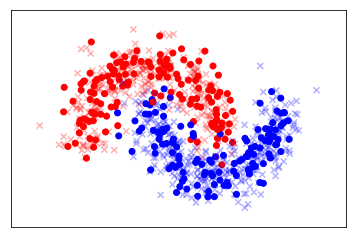

In [13]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_train.size)
print()
print("  first ", round(y_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_train.size/10) )):
    print( X_train[i], Y_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of parameter values has been chosen.
** YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


In [ ]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)


**Visualize the learnt boundary between classes in (2D) input space**

** THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plot, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if too small, an acceptable boundary cannot be obtained
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur
- **learning_rate, momentum, and solver**
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find optimal set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS MAKE SURE TO USE OPTIMAL VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01]}
 ]
#print(param_grid)

# Cross-validation grid-search
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=500, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
       warm_start=False), 
       param_grid, cv=3, scoring='%s_macro' % score)
    
    clf.fit(X_train, Y_train_OneHot)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test_OneHot, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


In [ ]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)

# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
